In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Trích xuất đặc trưng trên tập train

In [2]:
import os
from keras.preprocessing.image import load_img, img_to_array

In [3]:
# tải ảnh ko có khẩu trang từ tập train và gán nhãn 1

masked_img = []
path = "/gdrive/MyDrive/Project_final/Dataset/BAFMD_Dataset/train/train_cut/mask/"

for img_file in os.listdir(path):  # Lặp qua tất cả các file trong thư mục
    img_path = os.path.join(path, img_file)  # Tạo đường dẫn đầy đủ đến file
    image = load_img(img_path, target_size=(128, 128))
    masked_img.append(img_to_array(image) / 255.)

y_masked = [1] * len(masked_img)

In [4]:
# tải ảnh ko có khẩu trang từ tập train và gán nhãn 0

face_img = []
path_ = "/gdrive/MyDrive/Project_final/Dataset/BAFMD_Dataset/train/train_cut/no mask"
for img_file in os.listdir(path_):  # Lặp qua tất cả các file trong thư mục
    img_path = os.path.join(path_, img_file)  # Tạo đường dẫn đầy đủ đến file
    image = load_img(img_path, target_size = (128,128))
    face_img.append(img_to_array(image)/255.)

y_face = [0]*len(face_img)

In [5]:
len(masked_img),len(face_img)

(794, 75)

In [6]:
import matplotlib.pyplot as plt

In [7]:
# plot images
def plt_img(img_arr):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img_arr[i])
    plt.tight_layout()
#     plt.savefig("data_pics")
    plt.show()

In [8]:
import cv2
import numpy as np

In [9]:
# resize ảnh
def resize_images(image_array, size=(64, 128)):
    resized_images = []
    for img in image_array:
        img_resized = cv2.resize(img, size)
        resized_images.append(img_resized)
    return np.array(resized_images)

In [10]:
resized_masked_img = resize_images(masked_img)
resized_face_img = resize_images(face_img)

In [11]:
def plot_hog_img(img_arr, hog_arr):
    plt.figure(figsize=(10, 10))
    for i in range(6):
        # Convert color image to grayscale
        gray_img = cv2.cvtColor(img_arr[i], cv2.COLOR_BGR2GRAY)
        # Plot grayscale image
        plt.subplot(4, 4, i * 2 + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(gray_img, cmap='gray')
        # Plot HOG features (grayscale using 'gray' colormap)
        plt.subplot(4, 4, i * 2 + 2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(hog_arr[i], cmap=plt.cm.gray)
    plt.tight_layout()
    plt.show()

In [12]:
gray_facemask_img = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in resized_masked_img]
gray_face_img = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in resized_face_img]

In [13]:
len(masked_img), len(resized_masked_img), len(gray_facemask_img)

(794, 794, 794)

In [14]:
len(face_img), len(resized_face_img), len(gray_face_img)

(75, 75, 75)

### Trích xuất đặc trưng

In [15]:
from skimage.feature import hog

In [16]:
# Extracting HOG features of masked images
hog_m_img = []
for image in gray_facemask_img[:8]:
    fd,hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2),visualize=True)
    hog_m_img.append(hog_image)

hog_m_features = []
for image in gray_facemask_img:
    fd = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2),visualize=False)
    hog_m_features.append(fd)

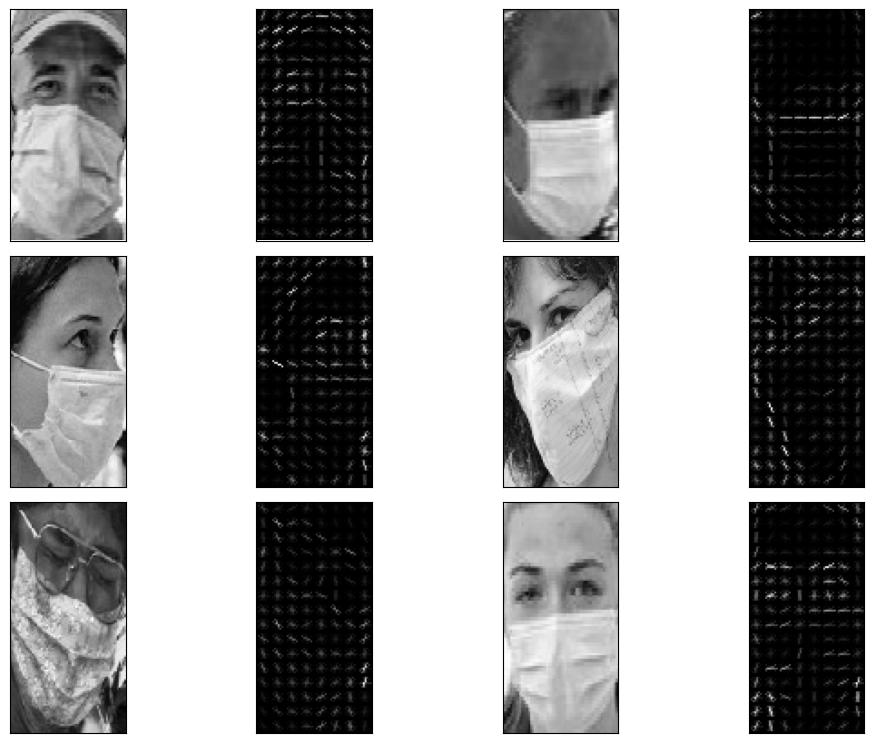

In [17]:
plot_hog_img(resized_masked_img,hog_m_img)

In [18]:
# Extracting HOG features of face images
hog_f_img = []
for image in gray_face_img[:8]:
    fd,hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2),visualize=True)
    hog_f_img.append(hog_image)

hog_f_features = []
for image in gray_face_img:
    fd = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2),visualize=False)
    hog_f_features.append(fd)

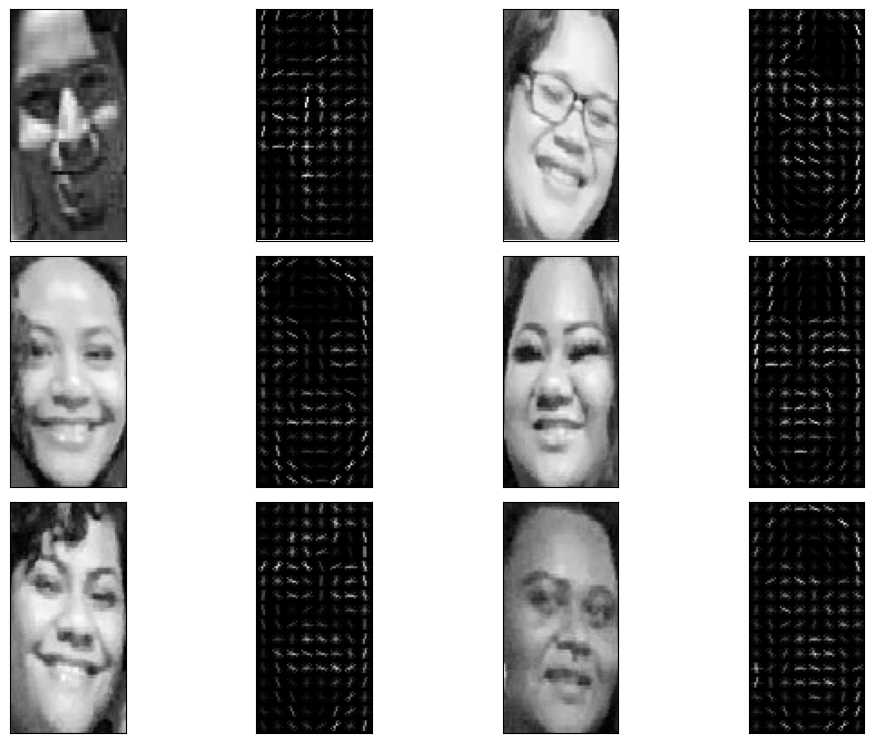

In [19]:
plot_hog_img(resized_face_img,hog_f_img)

### Xử lý đặc trưng trước khi train model

In [20]:
# Kết hợp mask và nomask
X_list = hog_f_features + hog_m_features
y_list = y_face + y_masked

In [22]:
len(X_list)

869

In [ ]:
# chuyển thành dạng NUmpy
X = np.array(X_list)
X.shape

y = np.array(y_list)
y.shape

(869,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [ ]:
from collections import Counter
Counter(y), Counter(y_train), Counter(y_val)

(Counter({0: 75, 1: 794}), Counter({1: 635, 0: 60}), Counter({1: 159, 0: 15}))

# Train model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### SVM - Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Khởi tạo SVC classifier
svc = SVC()

# Khai báo lưới các giá trị tham số cần tìm kiếm
param_grid = {'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly']}

# Tạo GridSearchCV object với SVC classifier và param_grid
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)

# Fit GridSearchCV với dữ liệu huấn luyện
grid.fit(x_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid.best_params_)

# Dự đoán với dữ liệu kiểm tra
predicted_labels_svc = grid.predict(x_val)

# In ra báo cáo đánh giá mô hình
from sklearn.metrics import classification_report
print(classification_report(y_val, predicted_labels_svc))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.914 total time=   0.8s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.914 total time=   0.7s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.914 total time=   0.7s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.914 total time=   0.7s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.914 total time=   0.7s
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.950 total time=   0.2s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.942 total time=   0.2s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.957 total time=   0.2s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.942 total time=   0.2s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.964 total time=   0.2s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.942 total time=   0.3s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

In [ ]:
svc_h = SVC(C = 4.0, gamma = 0.01, kernel = 'rbf')
svc_h.fit(x_train, y_train)

SVC(C=4.0, gamma=0.01)

In [ ]:
predicted_svc = svc_h.predict(x_val)

svm_accuracy = accuracy_score(y_val, predicted_svc)
svm_precision = precision_score(y_val, predicted_svc)
svm_recall = recall_score(y_val, predicted_svc)
svm_f1_score = f1_score(y_val, predicted_svc)

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1_score)

Accuracy: 0.9597701149425287
Precision: 0.9634146341463414
Recall: 0.9937106918238994
F1 Score: 0.978328173374613


### KNN - K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Tạo mô hình KNN
knn = KNeighborsClassifier()

# Tạo GridSearchCV
param_grid = {'n_neighbors': [1,2,3, 5, 7, 9, 11,13,15,17,19,21]}
grid_search = GridSearchCV(knn, param_grid)

# Huấn luyện mô hình
grid_search.fit(x_train, y_train)

# Phân tích kết quả
print("Giá trị k tối ưu:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

Giá trị k tối ưu: {'n_neighbors': 3}


Giải thích khả thi cho độ lệch chuẩn nhỏ:

Bộ dữ liệu có thể nhỏ: Nếu bộ dữ liệu được sử dụng để đào tạo mô hình tương đối nhỏ, nó có thể không nắm bắt được toàn bộ phạm vi biến đổi mà mô hình có thể gặp phải trong sử dụng thực tế. Điều này có thể dẫn đến việc mô hình hoạt động tương tự nhau trên các số lượng láng giềng khác nhau.
Dữ liệu có thể dễ phân tách: Nếu các điểm dữ liệu trong tập dữ liệu của bạn được phân tách tự nhiên thành các lớp, mô hình có thể không cần xem xét nhiều láng giềng để đưa ra dự đoán chính xác. Điều này cũng có thể góp phần tạo nên hiệu suất tương tự trên các giá trị n_neighbors khác nhau.
Phạm vi n_neighbors được chọn có thể quá hẹp: Có thể phạm vi số lượng láng giềng bạn khám phá (từ 3 đến 7) không bao hàm giá trị tối ưu. Có thể có sự khác biệt hiệu suất đáng kể nếu bạn xem xét một phạm vi rộng hơn của các láng giềng

Do tỷ lệ masked cao hơn đáng kể so với face (6:1), mô hình có thể học tập chủ yếu từ các mẫu masked và ít chú ý hơn đến các mẫu face. Điều này dẫn đến việc mô hình dự đoán hầu hết các ảnh là masked, bất kể giá trị n_neighbors là bao nhiêu. Do đó, độ chính xác, độ chính xác, độ thu hồi và điểm F1 đều có xu hướng gần bằng nhau và ít thay đổi khi n_neighbors thay đổi.

In [ ]:
n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Evaluate the model on test data
y_pred = knn.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the accuracy score for the current n_neighbors value
print(f"n_neighbors: {n_neighbors}, Accuracy: {accuracy}")
print(f"n_neighbors: {n_neighbors},Precision:, {precision}")
print(f"n_neighbors: {n_neighbors},Recall:, {recall}")
print(f"n_neighbors: {n_neighbors},F1 Score:, {f1}")

n_neighbors: 3, Accuracy: 0.9482758620689655
n_neighbors: 3,Precision:, 0.9464285714285714
n_neighbors: 3,Recall:, 1.0
n_neighbors: 3,F1 Score:, 0.9724770642201834


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Khởi tạo Logistic Regression classifier
log_reg = LogisticRegression()

# Khai báo lưới các giá trị tham số cần tìm kiếm
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Tạo GridSearchCV object với Logistic Regression classifier và param_grid
grid = GridSearchCV(log_reg, param_grid, refit=True, verbose=3)

# Fit GridSearchCV với dữ liệu huấn luyện
grid.fit(x_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.914 total time=   0.1s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.914 total time=   0.2s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.914 total time=   0.2s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.914 total time=   0.2s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.914 total time=   0.1s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..................C=10, penalty=l2;, score=0.950 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..................C=10, penalty=l2;, score=0.957 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..................C=10, penalty=l2;, score=0.942 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..................C=10, penalty=l2;, score=0.964 total time=   0.8s
[CV 1/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=100, penalty=l2;, score=0.950 total time=   0.6s
[CV 2/5] END .................C=100, penalty=l2;, score=0.950 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .................C=100, penalty=l2;, score=0.957 total time=   0.8s
[CV 4/5] END .................C=100, penalty=l2;, score=0.942 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceba

[CV 5/5] END .................C=100, penalty=l2;, score=0.964 total time=   0.8s
Best Parameters: {'C': 1, 'penalty': 'l2'}


In [ ]:
log_reg = LogisticRegression(C = 1, penalty = 'l2')#max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(C=1)

In [ ]:
# Evaluate the model on test data
y_pred_log = log_reg.predict(x_val)
accuracy = accuracy_score(y_val, y_pred_log)
precision = precision_score(y_val, y_pred_log)
recall = recall_score(y_val, y_pred_log)
f1 = f1_score(y_val, y_pred_log)

# Print the accuracy score for the current n_neighbors value
print(f"n_neighbors: {n_neighbors}, Accuracy: {accuracy}")
print(f"n_neighbors: {n_neighbors},Precision:, {precision}")
print(f"n_neighbors: {n_neighbors},Recall:, {recall}")
print(f"n_neighbors: {n_neighbors},F1 Score:, {f1}")

n_neighbors: 3, Accuracy: 0.9597701149425287
n_neighbors: 3,Precision:, 0.9634146341463414
n_neighbors: 3,Recall:, 0.9937106918238994
n_neighbors: 3,F1 Score:, 0.978328173374613


# Đánh giá trên tập val

In [ ]:
# Mô hình SVM
svm_accuracy = accuracy_score(y_val, predicted_svc)
svm_precision = precision_score(y_val, predicted_svc)
svm_recall = recall_score(y_val, predicted_svc)
svm_f1_score = f1_score(y_val, predicted_svc)

# Mô hình KNN
knn_accuracy = accuracy_score(y_val, y_pred)
knn_precision = precision_score(y_val,y_pred)
knn_recall = recall_score(y_val, y_pred)
knn_f1_score = f1_score(y_val, y_pred)

# Mô hình lr
lr_accuracy = accuracy_score(y_val, y_pred_log)
lr_precision = precision_score(y_val, y_pred_log)
lr_recall = recall_score(y_val,y_pred_log)
lr_f1_score = f1_score(y_val, y_pred_log)


In [ ]:
data = {
    'Model': ['SVM', 'KNN', 'Logistic Regression'],
    'Accuracy': [svm_accuracy, knn_accuracy, lr_accuracy],
    'Precision': [svm_precision, knn_precision, lr_precision],
    'Recall': [svm_recall, knn_recall, lr_recall],
    'F1 Score': [svm_f1_score, knn_f1_score, lr_f1_score]
}

df = pd.DataFrame(data)

# In ra DataFrame
print(df)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  SVM  0.959770   0.963415  0.993711  0.978328
1                  KNN  0.948276   0.946429  1.000000  0.972477
2  Logistic Regression  0.959770   0.963415  0.993711  0.978328


# Xử lý và Trích xuất đặc trưng trên ảnh test

In [ ]:
# tải ảnh mask từ tập test và gán nhãn 1

test_mask = []
test_path_mask= "/gdrive/MyDrive/Project_final/Dataset/BAFMD_Dataset/test/test_cut/mask"
for img_file in os.listdir(test_path_mask):  # Lặp qua tất cả các file trong thư mục
  img_path = os.path.join(test_path_mask, img_file)  # Tạo đường dẫn đầy đủ đến file
  image = load_img(img_path, target_size = (128,128))
  test_mask.append(img_to_array(image)/255.)

y_t_mask = [1]*len(test_mask)

In [ ]:
# tải ảnh no mask từ tập test và gán nhãn 0

test_nomask = []
test_path_nomask= "/gdrive/MyDrive/Project_final/Dataset/BAFMD_Dataset/test/test_cut/no mask"
for img_file in os.listdir(test_path_nomask):  # Lặp qua tất cả các file trong thư mục
  img_path = os.path.join(test_path_nomask, img_file)  # Tạo đường dẫn đầy đủ đến file
  image = load_img(img_path, target_size = (128,128))
  test_nomask.append(img_to_array(image)/255.)

y_t_face = [0]*len(test_nomask)

In [ ]:
resized_testmasked_img = resize_images(test_mask)
resized_testface_img = resize_images(test_nomask)

gray_testmask_img = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in resized_testmasked_img]
gray_testface_img = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in resized_testface_img]

In [ ]:
# Extracting HOG features of test images
hog_t_m_img = []
for image in gray_testmask_img[:8]:
    fd,hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True)
    hog_t_m_img.append(hog_image)

hog_t_m_features = []
for image in gray_testmask_img:
    fd = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=False)
    hog_t_m_features.append(fd)



In [ ]:
# Extracting HOG features of test images
hog_t_f_img = []
for image in gray_testface_img[:8]:
    fd = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True)
    hog_t_f_img.append(fd)

hog_t_f_features = []
for image in gray_testface_img:
    fd = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=False)
    print(fd)
    hog_t_f_features.append(fd)

[0.23964433 0.0205264  0.03840191 ... 0.00419488 0.00951413 0.        ]
[0.01932039 0.01552033 0.00948333 ... 0.00522862 0.03559476 0.01769693]
[0.26639363 0.2749175  0.08793656 ... 0.03300017 0.05570073 0.07666261]
[0.24048814 0.15598235 0.145279   ... 0.04169239 0.13935462 0.3649632 ]
[0.31249368 0.21894954 0.08014075 ... 0.01030868 0.01981983 0.06396533]
[0.08647319 0.02980824 0.03265164 ... 0.00977237 0.01651797 0.21773753]
[0.05256598 0.04550635 0.11420978 ... 0.22160324 0.3212421  0.10846476]
[0.1846245  0.04012423 0.05172425 ... 0.00787837 0.04170308 0.06106037]


In [ ]:
X_test = hog_t_f_features + hog_t_m_features
X_ = np.array(X_test)
X_.shape

(25, 3780)

In [ ]:
y_test = y_t_face + y_t_mask
y_ = np.array(y_test)
y_.shape

(25,)

In [ ]:
Counter(y_)

Counter({0: 8, 1: 17})

# Chạy model trên tập test

In [ ]:
test = '/gdrive/MyDrive/Project_final/Dataset/BAFMD_Dataset/test/test_cut/test'

### SVM

In [ ]:
predicted_labels_svc = svc_h.predict(X_)
print(predicted_labels_svc)
print(y_)

[1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


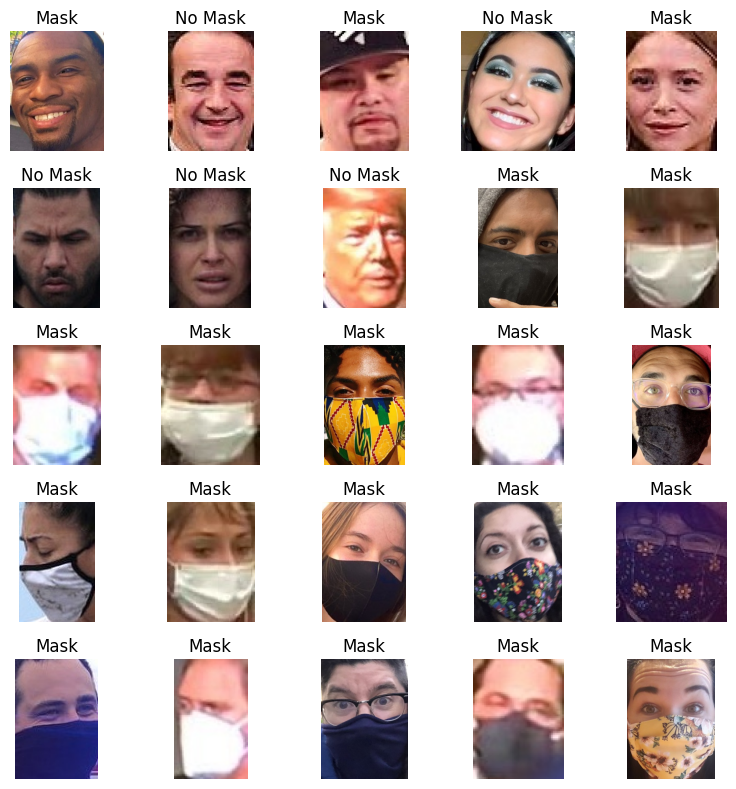

In [ ]:
# Số lượng hàng và cột
rows, cols = 5, 5

# Tạo figure và axes
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for idx, img_file in enumerate(os.listdir(test)):
    img_path = os.path.join(test, img_file)
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    row = idx // cols
    col = idx % cols

    axes[row, col].imshow(image_rgb)
    axes[row, col].axis('off')

    if predicted_labels_svc[idx] == 1:
        axes[row, col].set_title('Mask')
    else:
        axes[row, col].set_title('No Mask')

# Điều chỉnh khoảng cách giữa các ảnh
plt.tight_layout()
plt.show()

### KNN

In [ ]:
predicted_labels_knn = knn.predict(X_)
print(predicted_labels_knn)
print(y_)

[1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


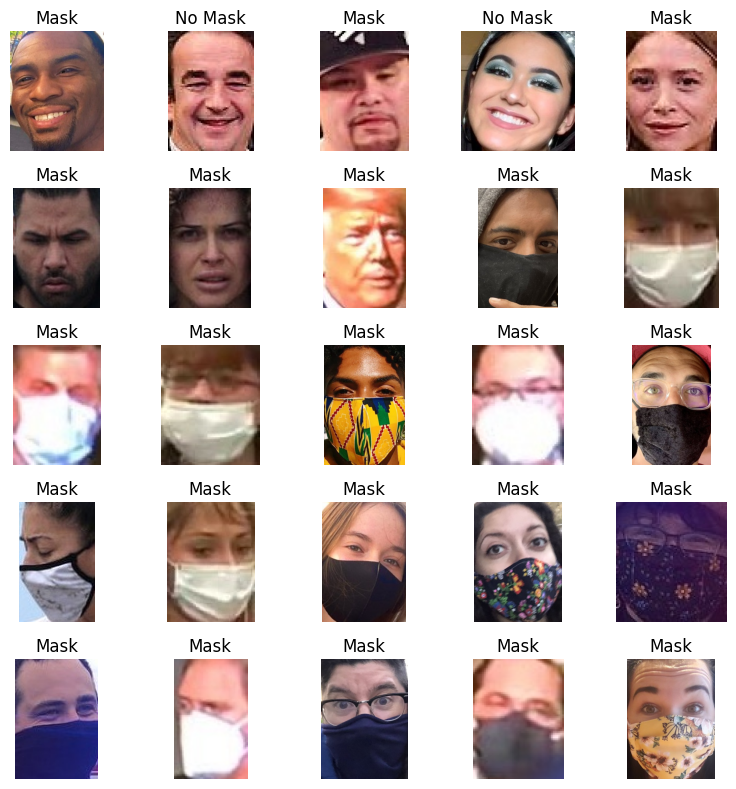

In [ ]:
# Số lượng hàng và cột
rows, cols = 5, 5

# Tạo figure và axes
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for idx, img_file in enumerate(os.listdir(test)):
    img_path = os.path.join(test, img_file)
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    row = idx // cols
    col = idx % cols

    axes[row, col].imshow(image_rgb)
    axes[row, col].axis('off')

    if predicted_labels_knn[idx] == 1:
        axes[row, col].set_title('Mask')
    else:
        axes[row, col].set_title('No Mask')

# Điều chỉnh khoảng cách giữa các ảnh
plt.tight_layout()
plt.show()

### LR

In [ ]:
predicted_labels_lr = log_reg.predict(X_)
print(predicted_labels_lr)
print(y_)

[1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


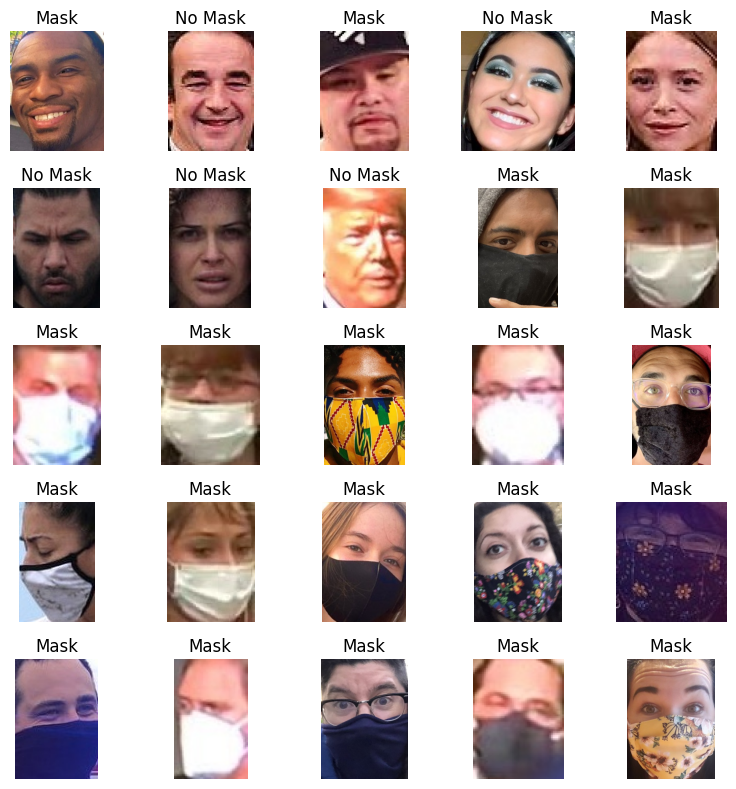

In [ ]:
# Số lượng hàng và cột
rows, cols = 5, 5

# Tạo figure và axes
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for idx, img_file in enumerate(os.listdir(test)):
    img_path = os.path.join(test, img_file)
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    row = idx // cols
    col = idx % cols

    axes[row, col].imshow(image_rgb)
    axes[row, col].axis('off')

    if predicted_labels_lr[idx] == 1:
        axes[row, col].set_title('Mask')
    else:
        axes[row, col].set_title('No Mask')

# Điều chỉnh khoảng cách giữa các ảnh
plt.tight_layout()
plt.show()

# Đánh giá mô hình

In [ ]:
import pandas as pd

In [ ]:
# Mô hình SVM
svm_accuracy = accuracy_score(y_, predicted_labels_svc)
svm_precision = precision_score(y_, predicted_labels_svc)
svm_recall = recall_score(y_, predicted_labels_svc)
svm_f1_score = f1_score(y_, predicted_labels_svc)

# Mô hình KNN
knn_accuracy = accuracy_score(y_, predicted_labels_knn)
knn_precision = precision_score(y_,predicted_labels_knn)
knn_recall = recall_score(y_, predicted_labels_knn)
knn_f1_score = f1_score(y_, predicted_labels_knn)

# Mô hình lr
lr_accuracy = accuracy_score(y_, predicted_labels_lr)
lr_precision = precision_score(y_, predicted_labels_lr)
lr_recall = recall_score(y_,predicted_labels_lr)
lr_f1_score = f1_score(y_, predicted_labels_lr)


In [ ]:
data = {
    'Model': ['SVM', 'KNN', 'Logistic Regression'],
    'Accuracy': [svm_accuracy, knn_accuracy, lr_accuracy],
    'Precision': [svm_precision, knn_precision, lr_precision],
    'Recall': [svm_recall, knn_recall, lr_recall],
    'F1 Score': [svm_f1_score, knn_f1_score, lr_f1_score]
}

df = pd.DataFrame(data)

# In ra DataFrame
print(df)

                 Model  Accuracy  Precision  Recall  F1 Score
0                  SVM      0.88    0.85000     1.0  0.918919
1                  KNN      0.76    0.73913     1.0  0.850000
2  Logistic Regression      0.88    0.85000     1.0  0.918919


# Thực nghiệm

In [ ]:
# tải ảnh mask từ tập test và gán nhãn 1

test_mask = []
test_path_mask= "/gdrive/MyDrive/Project_final/Dataset/BAFMD_Dataset/test/test/test"
for img_file in os.listdir(test_path_mask):  # Lặp qua tất cả các file trong thư mục
  img_path = os.path.join(test_path_mask, img_file)  # Tạo đường dẫn đầy đủ đến file
  image = load_img(img_path, target_size = (128,128))
  test_mask.append(img_to_array(image)/255.)

In [ ]:
resized_testmasked_img = resize_images(test_mask)

gray_testmask_img = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in resized_testmasked_img]

In [ ]:
# Extracting HOG features of test images
hog_t_m_img = []
for image in gray_testmask_img[:8]:
    fd,hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True)
    hog_t_m_img.append(hog_image)

hog_t_m_features = []
for image in gray_testmask_img:
    fd = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=False)
    hog_t_m_features.append(fd)



In [ ]:
_X_ = np.array(hog_t_m_features)
_X_.shape

(3, 3780)

In [ ]:
predicted_labels_svc = log_reg.predict(_X_)
print(predicted_labels_svc)


[0 1 1]


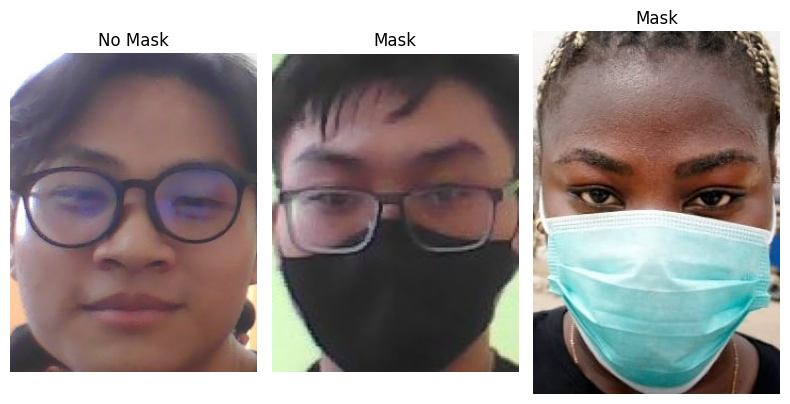

In [ ]:
# Tạo figure và axes
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for idx, img_file in enumerate(os.listdir(test_path_mask)):
    img_path = os.path.join(test_path_mask, img_file)
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[idx].imshow(image_rgb)
    axes[idx].axis('off')

    if predicted_labels_svc[idx] == 1:
        axes[idx].set_title('Mask')
    else:
        axes[idx].set_title('No Mask')

# Điều chỉnh khoảng cách giữa các ảnh
plt.tight_layout()
plt.show()

In [ ]:
predicted_labels_knn = knn.predict(_X_)
print(predicted_labels_knn)


[0 1 1]


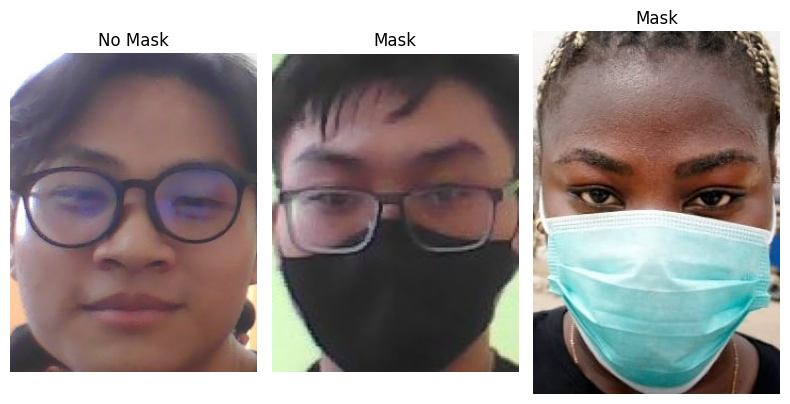

In [ ]:
# Tạo figure và axes
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for idx, img_file in enumerate(os.listdir(test_path_mask)):
    img_path = os.path.join(test_path_mask, img_file)
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[idx].imshow(image_rgb)
    axes[idx].axis('off')

    if predicted_labels_knn[idx] == 1:
        axes[idx].set_title('Mask')
    else:
        axes[idx].set_title('No Mask')

# Điều chỉnh khoảng cách giữa các ảnh
plt.tight_layout()
plt.show()

In [ ]:
predicted_labels_lr = log_reg.predict(_X_)
print(predicted_labels_lr)


[0 1 1]


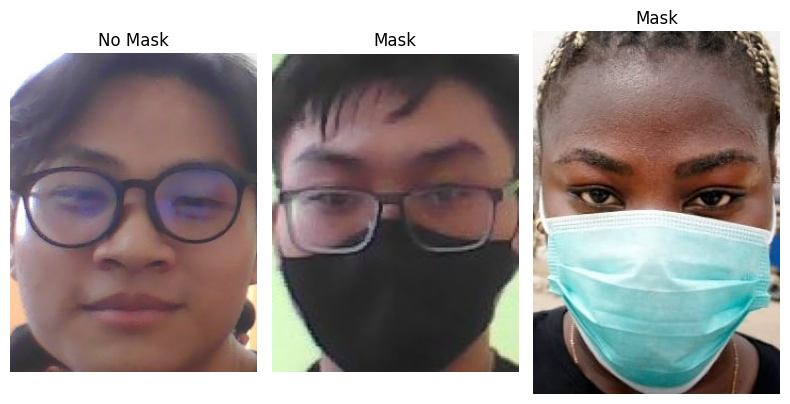

In [ ]:
# Tạo figure và axes
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for idx, img_file in enumerate(os.listdir(test_path_mask)):
    img_path = os.path.join(test_path_mask, img_file)
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[idx].imshow(image_rgb)
    axes[idx].axis('off')

    if predicted_labels_lr[idx] == 1:
        axes[idx].set_title('Mask')
    else:
        axes[idx].set_title('No Mask')

# Điều chỉnh khoảng cách giữa các ảnh
plt.tight_layout()
plt.show()

# Cắt ảnh thực nghiệm

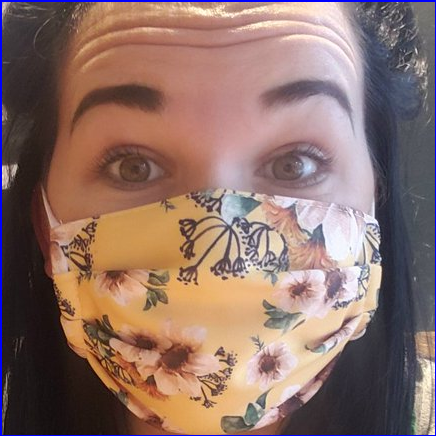

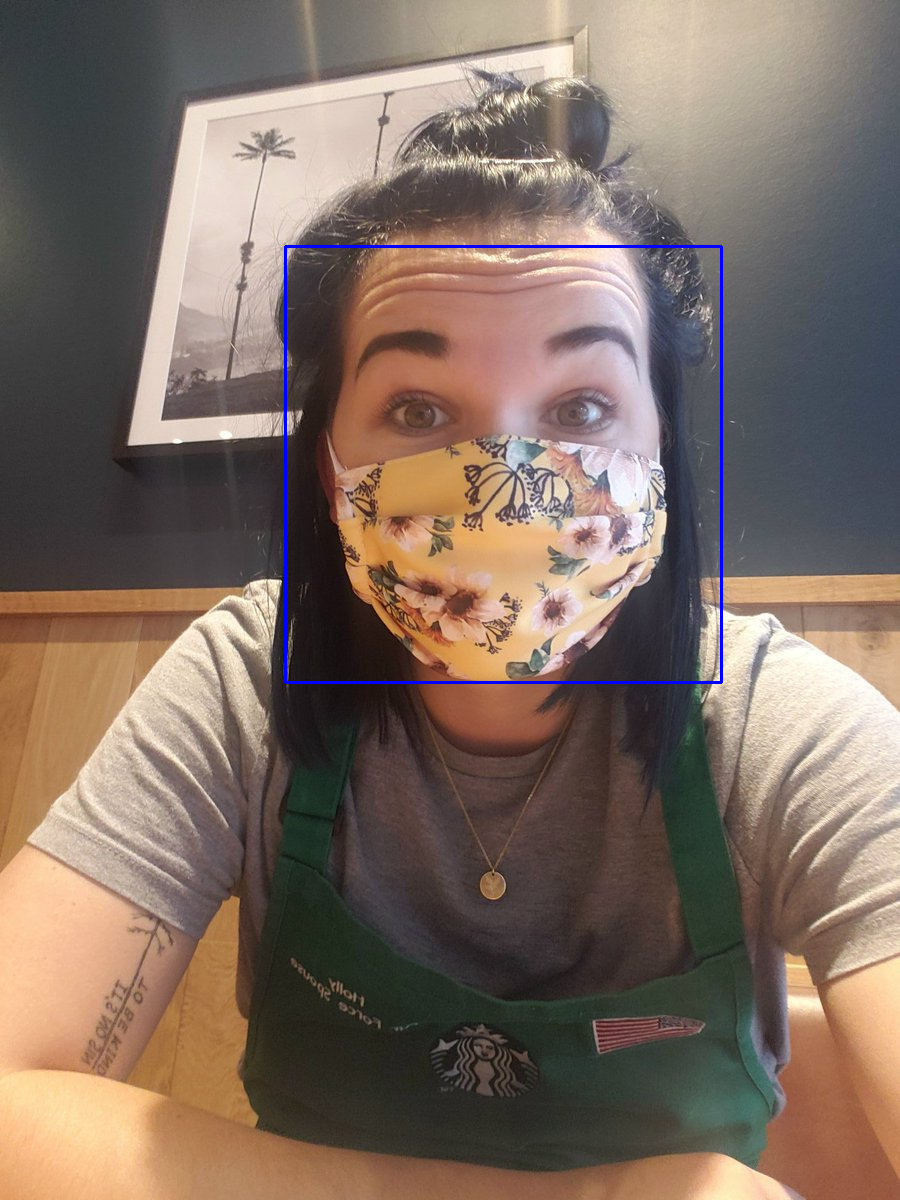

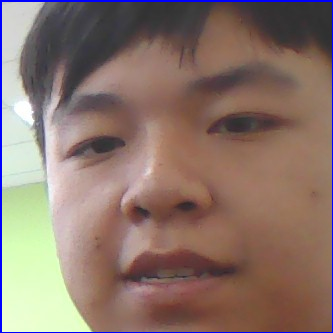

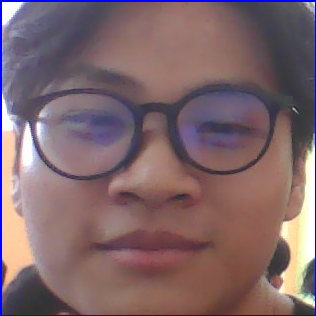

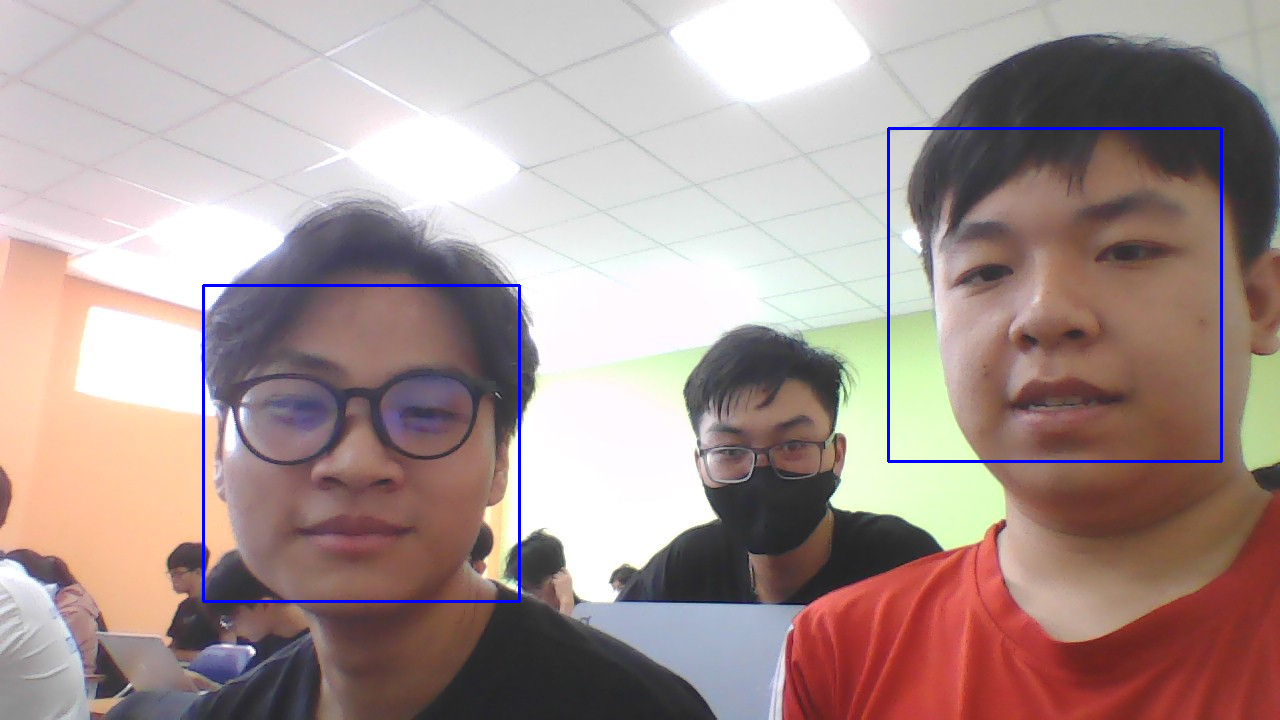

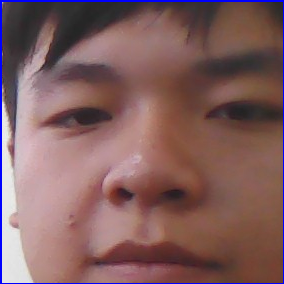

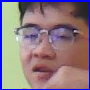

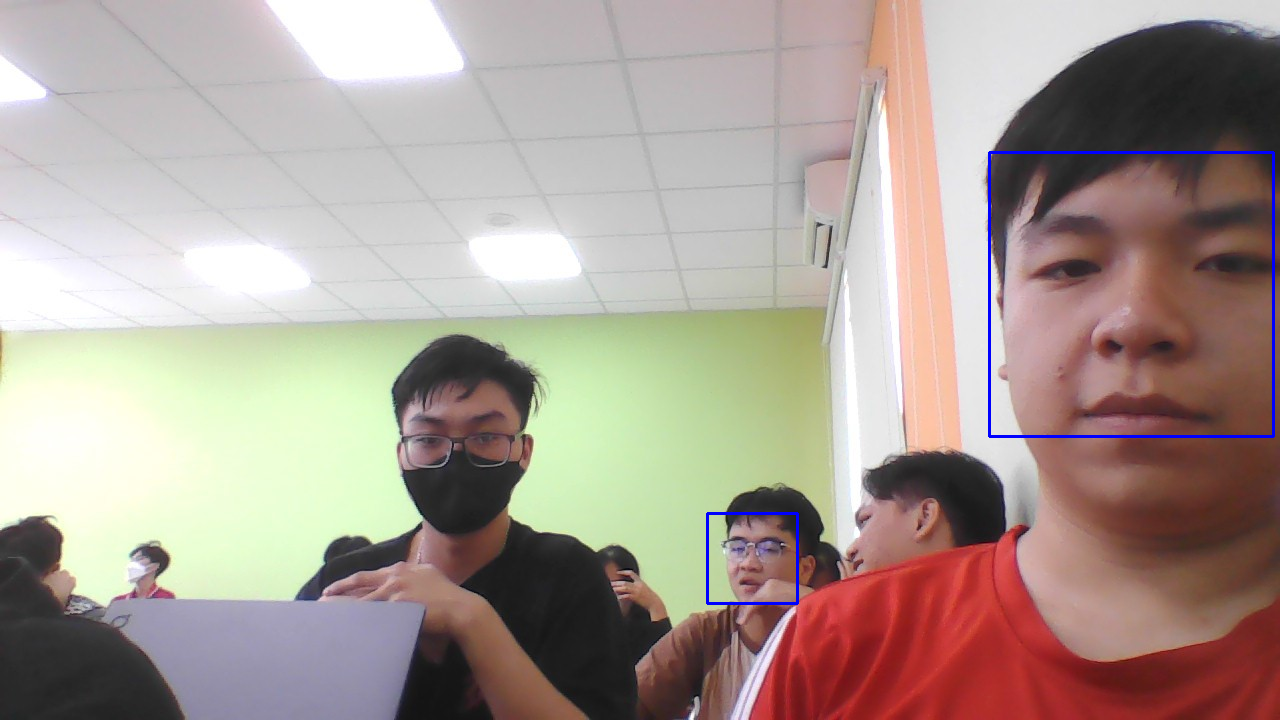

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the cascade
face_cascade = cv2.CascadeClassifier('/gdrive/MyDrive/Project_final/Code/haarcascade_frontalface_default.xml')

test_path_mask_2= "/gdrive/MyDrive/Project_final/Dataset/BAFMD_Dataset/test/test/test_2"

for idx, img_file in enumerate(os.listdir(test_path_mask_2)):
    img_path = os.path.join(test_path_mask_2, img_file)
    img = cv2.imread(img_path)

    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        faces = img[y:y + h, x:x + w]
        cv2_imshow(faces)

    # Display the output
    cv2_imshow(img)
